# 数据API
让我们使用tf.data.Dataset.from_tensor_slices()在RAM中完全创建一个数据集。

In [1]:
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X=tf.range(10)
X

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])>

In [3]:
dataset=tf.data.Dataset.from_tensor_slices(X)
dataset

<TensorSliceDataset shapes: (), types: tf.int32>

tf.data.Dataset.from_tensor_slices()函数采用一个张量并创建一个tf.data.Dataset。其元素都是X的切片(沿着第一个维度)，因此数据集包含十个元素。

In [4]:
for item in dataset:
    print(item)

tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)


## 链式转换

你可以通过如下的方式进行转换。

In [5]:
dataset=dataset.repeat(3).batch(7)

In [6]:
for item in dataset:
    print(item)

tf.Tensor([0 1 2 3 4 5 6], shape=(7,), dtype=int32)
tf.Tensor([7 8 9 0 1 2 3], shape=(7,), dtype=int32)
tf.Tensor([4 5 6 7 8 9 0], shape=(7,), dtype=int32)
tf.Tensor([1 2 3 4 5 6 7], shape=(7,), dtype=int32)
tf.Tensor([8 9], shape=(2,), dtype=int32)


![Chaining dataset transformations](./chaining.png)

数据集方法不会修改数据集，而是创建新的数据集，因此请保留对这些新数据集的引用。

你还可以用map()方法来调换元素。

In [7]:
dataset=dataset.map(lambda x: x*2)

In [8]:
for item in dataset:
    print(item)

tf.Tensor([ 0  2  4  6  8 10 12], shape=(7,), dtype=int32)
tf.Tensor([14 16 18  0  2  4  6], shape=(7,), dtype=int32)
tf.Tensor([ 8 10 12 14 16 18  0], shape=(7,), dtype=int32)
tf.Tensor([ 2  4  6  8 10 12 14], shape=(7,), dtype=int32)
tf.Tensor([16 18], shape=(2,), dtype=int32)


通常会希望产生多个线程来加快处理速度，可以设置num_parallel_cells参数。注意传给map()方法的函数必须可以转换为TF函数。

map()方法将转换应用于每个元素，但是apply()方法将转换应用于整个数据集。

In [9]:
dataset=dataset.apply(tf.data.experimental.unbatch())

Instructions for updating:
Use `tf.data.Dataset.unbatch()`.


In [10]:
for item in dataset:
    print(item)

tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(10, shape=(), dtype=int32)
tf.Tensor(12, shape=(), dtype=int32)
tf.Tensor(14, shape=(), dtype=int32)
tf.Tensor(16, shape=(), dtype=int32)
tf.Tensor(18, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(10, shape=(), dtype=int32)
tf.Tensor(12, shape=(), dtype=int32)
tf.Tensor(14, shape=(), dtype=int32)
tf.Tensor(16, shape=(), dtype=int32)
tf.Tensor(18, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(10, shape=(), dtype=int32)
tf.Tensor(12, shape=(), dtype=int32)
tf.Tensor(14, sh

可以使用filter()方法简单过滤数据集

In [11]:
dataset=dataset.filter(lambda x : x<10)

In [12]:
for item in dataset:
    print(item)

tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)


查看数据集中的一些元素可以使用take()方法

In [13]:
for item in dataset.take(3):
    print(item)

tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)


## 乱序数据

shuffle()方法进行乱序。它会创建一个新的数据集，该数据集首先将原数据集的第一项元素填充到缓冲区中。然后无论任何时候要求提供一个元素，它都会从缓冲区中随即取出一个元素，并用原数据集中的新元素替换它，直到遍历源数据为止，它将继续从缓冲区中随机抽取元素直到为空。

In [14]:
dataset=tf.data.Dataset.range(10).repeat(3)
dataset=dataset.shuffle(buffer_size=5,seed=42).batch(7)

In [15]:
for item in dataset:
    print(item)

tf.Tensor([0 2 3 6 7 9 4], shape=(7,), dtype=int64)
tf.Tensor([5 0 1 1 8 6 5], shape=(7,), dtype=int64)
tf.Tensor([4 8 7 1 2 3 0], shape=(7,), dtype=int64)
tf.Tensor([5 4 2 7 8 9 9], shape=(7,), dtype=int64)
tf.Tensor([3 6], shape=(2,), dtype=int64)


### 交织来自多个文件的行

首先假设你已经加载了加州住房数据集，并对其进行乱序，然后将其分为训练集、验证集和测试集。之后将每个集合分成许多类似如下的csv文件(每行包含8个输入特征以及目标房屋中间值)：

我们还假设train_filepaths包含训练文件路径的列表(并且你还有valid_filepaths和test_filepaths)：

In [16]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target.reshape(-1, 1), random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)
X_mean = scaler.mean_
X_std = scaler.scale_

In [17]:
def save_to_multiple_csv_files(data, name_prefix, header=None, n_parts=10):
    housing_dir = os.path.join("datasets", "housing")
    os.makedirs(housing_dir, exist_ok=True)
    path_format = os.path.join(housing_dir, "my_{}_{:02d}.csv")

    filepaths = []
    m = len(data)
    for file_idx, row_indices in enumerate(np.array_split(np.arange(m), n_parts)):
        part_csv = path_format.format(name_prefix, file_idx)
        filepaths.append(part_csv)
        with open(part_csv, "wt", encoding="utf-8") as f:
            if header is not None:
                f.write(header)
                f.write("\n")
            for row_idx in row_indices:
                f.write(",".join([repr(col) for col in data[row_idx]]))
                f.write("\n")
    return filepaths

In [18]:
import os
train_data = np.c_[X_train, y_train]
valid_data = np.c_[X_valid, y_valid]
test_data = np.c_[X_test, y_test]
header_cols = housing.feature_names + ["MedianHouseValue"]
header = ",".join(header_cols)

train_filepaths = save_to_multiple_csv_files(train_data, "train", header, n_parts=20)
valid_filepaths = save_to_multiple_csv_files(valid_data, "valid", header, n_parts=10)
test_filepaths = save_to_multiple_csv_files(test_data, "test", header, n_parts=10)

In [19]:
import pandas as pd

pd.read_csv(train_filepaths[0]).head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedianHouseValue
0,3.5214,15.0,3.049945,1.106548,1447.0,1.605993,37.63,-122.43,1.442
1,5.3275,5.0,6.490060,0.991054,3464.0,3.443340,33.69,-117.39,1.687
2,3.1000,29.0,7.542373,1.591525,1328.0,2.250847,38.44,-122.98,1.621
3,7.1736,12.0,6.289003,0.997442,1054.0,2.695652,33.55,-117.70,2.621
4,2.0549,13.0,5.312457,1.085092,3297.0,2.244384,33.93,-116.93,0.956


In [20]:
train_filepaths

['datasets\\housing\\my_train_00.csv',
 'datasets\\housing\\my_train_01.csv',
 'datasets\\housing\\my_train_02.csv',
 'datasets\\housing\\my_train_03.csv',
 'datasets\\housing\\my_train_04.csv',
 'datasets\\housing\\my_train_05.csv',
 'datasets\\housing\\my_train_06.csv',
 'datasets\\housing\\my_train_07.csv',
 'datasets\\housing\\my_train_08.csv',
 'datasets\\housing\\my_train_09.csv',
 'datasets\\housing\\my_train_10.csv',
 'datasets\\housing\\my_train_11.csv',
 'datasets\\housing\\my_train_12.csv',
 'datasets\\housing\\my_train_13.csv',
 'datasets\\housing\\my_train_14.csv',
 'datasets\\housing\\my_train_15.csv',
 'datasets\\housing\\my_train_16.csv',
 'datasets\\housing\\my_train_17.csv',
 'datasets\\housing\\my_train_18.csv',
 'datasets\\housing\\my_train_19.csv']

现在让我们创建一个仅包含以下文件路径的数据集：

In [21]:
filepath_dataset=tf.data.Dataset.list_files(test_filepaths,seed=42)
# 匹配一个或多个 glob 模式的所有文件的数据集。

默认情况下，list_files()函数返回一个乱序文件的文件路径的数据集。通常这是一件好事，但是如果出于某种原因不希望这样做，则可以设置shuffle=False。

In [22]:
for item in filepath_dataset:
    print(item)

tf.Tensor(b'datasets\\housing\\my_test_05.csv', shape=(), dtype=string)
tf.Tensor(b'datasets\\housing\\my_test_09.csv', shape=(), dtype=string)
tf.Tensor(b'datasets\\housing\\my_test_06.csv', shape=(), dtype=string)
tf.Tensor(b'datasets\\housing\\my_test_04.csv', shape=(), dtype=string)
tf.Tensor(b'datasets\\housing\\my_test_07.csv', shape=(), dtype=string)
tf.Tensor(b'datasets\\housing\\my_test_01.csv', shape=(), dtype=string)
tf.Tensor(b'datasets\\housing\\my_test_02.csv', shape=(), dtype=string)
tf.Tensor(b'datasets\\housing\\my_test_08.csv', shape=(), dtype=string)
tf.Tensor(b'datasets\\housing\\my_test_03.csv', shape=(), dtype=string)
tf.Tensor(b'datasets\\housing\\my_test_00.csv', shape=(), dtype=string)


接下来，你可以调用interleave()方法一次读取5个文件并交织在它们的行(使用skip()方法跳过每个文件的第一个行,即行标题)

In [23]:
n_readers=5
dataset=filepath_dataset.interleave(lambda filepath: tf.data.TextLineDataset(filenames=filepath).skip(1),cycle_length=n_readers)

In [24]:
dataset

<InterleaveDataset shapes: (), types: tf.string>

interleave()方法将创建一个数据集，该数据集将从filepath_dataset中拉出5个文件路径，对于每个路径，它将调用你为其提供的函数来创建新的数据集。

此阶段共有7个数据集：文件路径数据集、交织数据集和由交织数据集在内部创建的5个TextLineDatasets，当我们遍历交织数据集时，它将循环遍历这5个TextLineDatasets，每次读取一行，直到所有的数据集都读出为止。

默认情况下。interleave()不使用并行。它只是顺序地从每个文件中一次读取一行。如果你希望它并行的读取文件，则可以将num_parallel_calls设置为所需要的线程数.也可以设置成tf.data.experimental.AUTOTUNE.

In [25]:
for line in dataset.take(5):
    print(line.numpy())

b'5.3623,15.0,7.55956678700361,1.1407942238267148,937.0,3.3826714801444044,33.73,-116.89,2.013'
b'5.5968,23.0,5.783870967741936,1.0290322580645161,1145.0,3.693548387096774,37.4,-121.85,2.432'
b'1.2012,12.0,1.4657534246575343,0.8986301369863013,1194.0,3.271232876712329,34.05,-118.27,2.75'
b'6.2427,19.0,6.446293494704992,1.0257186081694403,2621.0,3.9652042360060515,33.85,-118.08,2.887'
b'3.2596,33.0,5.017656500802568,1.0064205457463884,2300.0,3.691813804173355,32.71,-117.03,1.03'


## 预处理数据

In [26]:
# 实现一个执行预处理的小函数
n_inputs=8

In [27]:
def preprocess(line):
    defs=[0.]*n_inputs+[tf.constant([],dtype=tf.float32)]
    fields=tf.io.decode_csv(line,record_defaults=defs)
    x=tf.stack(fields[:-1])
    y=tf.stack(fields[-1:])
    return (x-X_mean)/X_std,y

该函数的解释看书，并不复杂。

In [28]:
preprocess(b'5.3623,15.0,7.55956678700361,1.1407942238267148,937.0,3.3826714801444044,33.73,-116.89,2.013')

(<tf.Tensor: shape=(8,), dtype=float32, numpy=
 array([ 0.7702099 , -1.0778131 ,  0.82483   ,  0.08842757, -0.44469705,
         0.1794734 , -0.89780813,  1.3465551 ], dtype=float32)>,
 <tf.Tensor: shape=(1,), dtype=float32, numpy=array([2.013], dtype=float32)>)

## 合并在一起
我们构造一个小的辅助函数：它将创建并返回一个数据集，该数据集有效地从多个csv文件中加载加州住房数据，对其进行预处理、随机乱序，可以选择重复并进行批处理。
![preprocessing](./preprocess.png)

In [29]:
def csv_reader_dataset(filepaths, repeat=1, n_readers=5, n_reader_threads=None, shuffle_buffer_size=10000, n_parse_threads=5, batch_size=32):
    dataset = tf.data.Dataset.list_files(filepaths)
    dataset = dataset.interleave(lambda filepath: tf.data.TextLineDataset(
        filepath).skip(1), cycle_length=n_readers, num_parallel_calls=n_reader_threads)
    dataset=dataset.map(preprocess,num_parallel_calls=n_parse_threads)
    dataset=dataset.shuffle(shuffle_buffer_size).repeat(repeat)
    return dataset.batch(batch_size).prefetch(1)

## 预取
通过最后调用prefetch(1)，我们正在创建一个数据集，该数据集将尽最大可能总是提前准备一个批次。换句话说，当我们训练算法正处理一个批次的时候，数据集已并行工作准备下一个批次了。

## 和tf.keras一起使用数据集
现在我们可以使用csv_reader_datasets()函数为训练集创建数据集。

In [30]:
train_set=csv_reader_dataset(train_filepaths)
valid_set=csv_reader_dataset(valid_filepaths)
test_set=csv_reader_dataset(test_filepaths)

In [31]:
for item in train_set.take(1):
    print(item)

(<tf.Tensor: shape=(32, 8), dtype=float32, numpy=
array([[ 0.6259667 , -0.44494775,  0.3778275 ,  0.06992896,  0.10104288,
        -0.00773004, -0.76194876,  0.8917654 ],
       [ 4.0929923 , -0.91959685,  1.5314441 ,  0.06020879,  0.27170068,
         3.918851  ,  1.0276414 , -1.2472363 ],
       [ 0.3574874 , -0.04940685, -0.22534129, -0.10014284,  0.6997141 ,
        -0.26909292, -0.80411196,  0.5819124 ],
       [ 0.50157374, -1.868895  ,  0.46941856, -0.03959163,  1.093961  ,
         0.03559649, -0.01706686,  0.96173245],
       [-0.94478816,  0.74167496, -0.61156577, -0.10433538,  0.7617715 ,
         0.3229953 , -0.75726473,  0.6118972 ],
       [-1.2130054 , -1.3942459 , -0.2613689 ,  0.03043593,  1.215338  ,
        -0.3110435 , -0.57924217,  1.1466476 ],
       [-0.27793753,  1.3745404 ,  0.09625438, -0.13260026, -0.71847963,
         0.02544731, -0.7760026 ,  0.7618288 ],
       [-1.0562965 , -0.20762321, -0.14830488,  0.12707646, -0.6618979 ,
        -0.2529792 ,  1.931806

In [32]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1),
])

In [33]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [34]:
batch_size = 32
model.fit(train_set, epochs=10,validation_data=valid_set)

Epoch 1/10
363/363 [==============================] - 15s 2ms/step - loss: 2.4037 - val_loss: 1.1860
Epoch 2/10
363/363 [==============================] - 0s 879us/step - loss: 0.7466 - val_loss: 0.6537
Epoch 3/10
363/363 [==============================] - 0s 890us/step - loss: 0.6338 - val_loss: 0.5988
Epoch 4/10
363/363 [==============================] - 0s 928us/step - loss: 0.6019 - val_loss: 0.5645
Epoch 5/10
363/363 [==============================] - 0s 893us/step - loss: 0.5723 - val_loss: 0.5352
Epoch 6/10
363/363 [==============================] - 0s 873us/step - loss: 0.5531 - val_loss: 0.5136
Epoch 7/10
363/363 [==============================] - 0s 895us/step - loss: 0.5264 - val_loss: 0.5031
Epoch 8/10
363/363 [==============================] - 0s 895us/step - loss: 0.5213 - val_loss: 0.4799
Epoch 9/10
363/363 [==============================] - 0s 843us/step - loss: 0.4833 - val_loss: 0.4763
Epoch 10/10
363/363 [==============================] - 0s 854us/step - loss: 0.4884

将数据集和验证集直接传递给fit()方法。

In [35]:
model.evaluate(test_set)

162/162 [==============================] - 0s 595us/step - loss: 0.4771


0.47709891200065613

In [36]:
new_set=test_set.take(3).map(lambda X,y:X)
model.predict(new_set)

array([[2.2170458 ],
       [2.5704403 ],
       [5.0930634 ],
       [1.7192392 ],
       [2.387019  ],
       [1.7833905 ],
       [1.4368004 ],
       [1.6693234 ],
       [1.5936759 ],
       [1.6352576 ],
       [2.0822856 ],
       [1.0413637 ],
       [2.2652988 ],
       [2.8106225 ],
       [1.2317045 ],
       [2.369283  ],
       [1.772979  ],
       [2.0483487 ],
       [3.2839038 ],
       [2.586651  ],
       [2.248283  ],
       [3.6538444 ],
       [1.6296895 ],
       [2.3292778 ],
       [1.5256877 ],
       [2.2392294 ],
       [3.516539  ],
       [0.8947282 ],
       [2.1898682 ],
       [2.265708  ],
       [1.7842765 ],
       [1.5890962 ],
       [2.178831  ],
       [1.8324475 ],
       [2.8765388 ],
       [4.368442  ],
       [1.967953  ],
       [1.9726961 ],
       [2.5781004 ],
       [1.5926174 ],
       [1.5536399 ],
       [3.1279664 ],
       [1.0283985 ],
       [3.1463778 ],
       [1.0768527 ],
       [3.8612533 ],
       [1.6391737 ],
       [1.402

到目前为止，我们使用了csv文件，这些文件是通用的，简单且便捷的，但是效率并不高，并不能很好的支持大型或复杂的数据结构。因此让我们使用TFrecords。

# TFRecord格式
你可以使用tf.io.TFRecordWriter类轻松的建立TFRecord文件

In [37]:
with tf.io.TFRecordWriter('my_data.tfrecord') as f:
    f.write(b"This is the first record")
    f.write(b"And this is the second record")

In [38]:
filepaths=["my_data.tfrecord"]
dataset=tf.data.TFRecordDataset(filenames=filepaths)
for item in dataset:
    print(item)

tf.Tensor(b'This is the first record', shape=(), dtype=string)
tf.Tensor(b'And this is the second record', shape=(), dtype=string)


默认情况下，TFRecordDataset将一个接一个地读取文件，但是你可以通过设置num_parallel_reads使其并行读取多个文件并交织记录。

## 压缩的TFRecord文件
你可以通过设置options参数来创建压缩的TFRecord文件。

In [39]:
options=tf.io.TFRecordOptions(compression_type='GZIP')

In [40]:
with tf.io.TFRecordWriter("my_compressed.tfrecord",options) as f:
    f.write(b"This is the first record")
    f.write(b"And this is the second record")

In [41]:
dataset=tf.data.TFRecordDataset(filenames='my_compressed.tfrecord',compression_type='GZIP')

In [42]:
for item in dataset:
    print(item)

tf.Tensor(b'This is the first record', shape=(), dtype=string)
tf.Tensor(b'And this is the second record', shape=(), dtype=string)


## 协议缓冲区简介
不重要，看书。

## TensorFlow协议

## 加载和解析Example

## 使用SequenceExample Protobuf

# 预处理输入特征
让我们看看模型中的预处理层。

In [43]:
# 例如这是使用Lambda层实现标准化的方法。
means=np.mean(X_train,axis=0,keepdims=True)
stds=np.std(X_train,axis=0,keepdims=True)
eps=keras.backend.epsilon()

In [44]:
model=keras.models.Sequential([keras.layers.Lambda(lambda inputs:(inputs-means)/(stds+eps)),keras.layers.Dense(1)])

这并不难，但是你希望使用一个很好的自包含自定义层：

In [45]:
class Standardization(keras.layers.Layer):
    def __init__(self,**kwargs):
        super().__init__(**kwargs)
    def adapt(self,data_sample):
        self.means_=np.mean(data_sample,axis=0,keepdims=True)
        self.stds_=np.std(data_sample,axis=0,keepdims=True)
    def call(self,inputs):
        return (inputs-self.means_)/(self.stds_+keras.backend.epsilon())

In [46]:
std_layer=Standardization()

In [47]:
std_layer.adapt(X_train)

在使用该层之前，你需要调用adapt方法()来使其适应数据集并将其传递给数据样本。

In [48]:
model=keras.models.Sequential()
model.add(std_layer)

keras.layers.Normal标准化层就是使用的该原理，现在可以直接使用。使用方法跟上面相同。

## 使用one-hot编码分类特征

In [49]:
import pandas as pd
housing=pd.read_csv('./housing.csv')

In [50]:
housing.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [51]:
vocab=["<1H OCEAN","INLAND","NEAR OCEAN","NEAR BAY","ISLAND"]

In [52]:
indices=tf.range(len(vocab),dtype=tf.int64)

In [53]:
table_init=tf.lookup.KeyValueTensorInitializer(vocab,indices)
num_oov_buckets=2
table=tf.lookup.StaticVocabularyTable(table_init,num_oov_buckets)

- 首先我们定义词汇表，这是所有可能类别的列表。
- 然后我们创建带有相应索引的张量。
- 接下来我们为查找表创建一个初始化程序，将类别列表及其对应的索引传递给它。在此示例中，我们已有此数据，因此我们使用KeyValueTensorInitializer。
- 在最后两行中，我们创建了查找表，为其提供了初始化程序并指定了词汇表外桶的数量。如果我们查找词汇表中不存在的类别，则查找表将计算该类别的哈希并将在这个未知类别分配给ovv桶中的一个。

In [54]:
# 现在我们使用查找表将一小部分数据转换成one-hot编码：
categories=tf.constant(["NEAR BAY","DESERT","INLAND","INLAND"])
cat_indices=table.lookup(categories)

In [55]:
cat_indices

<tf.Tensor: shape=(4,), dtype=int64, numpy=array([3, 5, 1, 1], dtype=int64)>

In [56]:
cat_one_hot=tf.one_hot(cat_indices,depth=len(vocab)+num_oov_buckets)

In [57]:
cat_one_hot

<tf.Tensor: shape=(4, 7), dtype=float32, numpy=
array([[0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.]], dtype=float32)>

## 使用Embedding编码分类特征
嵌入是表示类别的可训练密集向量。默认情况下，嵌入是随机初始化的，例如，"NEAR BAY"类别最初可以由诸如[0.131,0.890]的随机向量表示。

让我们看看如何手动实现embedding以了解它的工作原理，首先我们要创建一个包含每个类别embedding的Eembedding矩阵，并随机初始化。每个类别和每个ovv桶都有一行，每个嵌入维度都有一列。

In [58]:
embedding_dim=2
embed_init=tf.random.uniform([len(vocab)+num_oov_buckets,embedding_dim])
embedding_matrix=tf.Variable(embed_init)

In [59]:
embedding_matrix

<tf.Variable 'Variable:0' shape=(7, 2) dtype=float32, numpy=
array([[0.7413678 , 0.62854624],
       [0.01738465, 0.3431449 ],
       [0.51063764, 0.3777541 ],
       [0.07321596, 0.02137029],
       [0.2871771 , 0.4710616 ],
       [0.6936141 , 0.07321334],
       [0.93251204, 0.20843053]], dtype=float32)>

让我们对之前相同的分类特征进行编码，但这次使用Embedding。

In [60]:
categories=tf.constant(["NEAR BAY","DESERT","INLAND","INLAND"])
cat_indices=table.lookup(categories)

In [61]:
cat_indices

<tf.Tensor: shape=(4,), dtype=int64, numpy=array([3, 5, 1, 1], dtype=int64)>

In [62]:
tf.nn.embedding_lookup(embedding_matrix,cat_indices)

<tf.Tensor: shape=(4, 2), dtype=float32, numpy=
array([[0.07321596, 0.02137029],
       [0.6936141 , 0.07321334],
       [0.01738465, 0.3431449 ],
       [0.01738465, 0.3431449 ]], dtype=float32)>

tf.nn.embedding_lookup()函数以给定的索引查找在嵌入矩阵中的行，这就是它所做的全部。

keras提供了一个keras.layers.Embedding层来处理Embedding矩阵。创建层时，它将随机初始化嵌入矩阵，然后使用某些类别索引调用的时，它将返回嵌入矩阵这些索引处的行。

In [63]:
embedding=keras.layers.Embedding(input_dim=len(vocab)+num_oov_buckets,output_dim=embedding_dim)

In [64]:
embedding(cat_indices)

<tf.Tensor: shape=(4, 2), dtype=float32, numpy=
array([[ 0.01289039,  0.0191061 ],
       [ 0.01639661, -0.01945841],
       [ 0.00692506, -0.00518861],
       [ 0.00692506, -0.00518861]], dtype=float32)>

把所有内容放在一起，我们现在可以创建一个keras模型，该模型可以处理分类特征并学习每个类别的Embedding。

In [65]:
regular_inputs=keras.layers.Input(shape=[8])
categories=keras.layers.Input(shape=[],dtype=tf.string)
cat_indices=keras.layers.Lambda(lambda cats:table.lookup(cats))(categories)
cat_embed=keras.layers.Embedding(input_dim=6,output_dim=2)(cat_indices)
encoded_inputs=keras.layers.concatenate([regular_inputs,cat_embed])
outputs=keras.layers.Dense(1)(encoded_inputs)
model=keras.models.Model(inputs=[regular_inputs,categories],outputs=[outputs])

## keras预处理层
- keras.layers.Normalization层，执行特征标准化。
- TextVectorization层，能够将输入中的每个单词编码为它在词汇表中的索引。
在这两种情况下你创建层，并使用数据样本调用adapt()方法，然后再模型中正常使用该层。
- keras.layers.Discretization层，它将数据切成不同的离散块，并将每个块编码成一个one-hot。Discretization类不可微分，应该仅在模型开始时使用。

你也可以用preprocessingStage类连接多个预处理层。

TextVectorization层还可以选择输出单词计数向量，而不是单词索引。应该减少常用单词重要性的方式对单词计数进行归一化，此技术称为TF-IDF。详见书，

# TF Transform
详见书。

# TensorFlow数据项目

调用tfds.load()函数，它会下载你想要的数据集，并将该数据作为数据集的目录返回。

In [66]:
import tensorflow_datasets as tfds
dataset=tfds.load(name='mnist')

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling mnist-train.tfrecord...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling mnist-test.tfrecord...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Dataset mnist downloaded and prepared to C:\Users\10093\tensorflow_datasets\mnist\3.0.1. Subsequent calls will reuse this data.


In [67]:
mnist_train,mnist_test=dataset["train"],dataset["test"]

然后你可以应用你所需要的任何转换，并且准备好训练你的模型。

In [68]:
mnist_train=mnist_train.shuffle(10000).batch(32).prefetch(1)

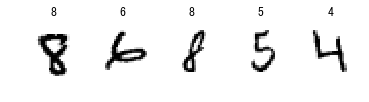

In [69]:
plt.figure(figsize=(6,3))
for item in mnist_train:
    images = item["image"]
    labels = item["label"]
    for index in range(5):
        plt.subplot(1, 5, index + 1)
        image = images[index, ..., 0]
        label = labels[index].numpy()
        plt.imshow(image, cmap="binary")
        plt.title(label)
        plt.axis("off")
    break # just showing part of the first batch